# Predicting Car Price


In [1]:
import numpy as np
import pandas as pd

In [4]:
pd.options.display.max_columns=99

In [6]:
cols = ['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style', 
        'drive-wheels', 'engine-location', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type', 
        'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-rate', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']
car_data=pd.read_csv('imports-85.data',names=cols)
car_data.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [7]:
car_data['num-of-doors'].value_counts()

four    114
two      89
?         2
Name: num-of-doors, dtype: int64

In [8]:
car_data['normalized-losses'].value_counts()

?      41
161    11
91      8
150     7
134     6
128     6
104     6
85      5
94      5
65      5
102     5
74      5
168     5
103     5
95      5
106     4
93      4
118     4
148     4
122     4
83      3
125     3
154     3
115     3
137     3
101     3
119     2
87      2
89      2
192     2
197     2
158     2
81      2
188     2
194     2
153     2
129     2
108     2
110     2
164     2
145     2
113     2
256     1
107     1
90      1
231     1
142     1
121     1
78      1
98      1
186     1
77      1
Name: normalized-losses, dtype: int64

In [9]:
# select only the cols with continuous values
continuous_value_cols=['normalized-losses','wheel-base','length','width','height','curb-weight','engine-size','bore','stroke','compression-rate','horsepower','peak-rpm','city-mpg','highway-mpg','price']

In [10]:
len(continuous_value_cols)

15

In [11]:
numeric_cars=car_data[continuous_value_cols]

In [12]:
numeric_cars.head()

,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,?,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495
1,?,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500
2,?,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500
3,164,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950
4,164,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450


# Data Cleaning

In [13]:
numeric_cars=numeric_cars.replace('?',np.nan)
numeric_cars.head()

,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,NaN,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495
1,NaN,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500
2,NaN,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500
3,164,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950
4,164,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450


In [14]:
numeric_cars=numeric_cars.astype('float')
numeric_cars.isnull().sum()

normalized-losses    41
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-size           0
bore                  4
stroke                4
compression-rate      0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

In [15]:
numeric_cars['normalized-losses'].mean()

122.0

In [19]:
numeric_cars[numeric_cars['bore'].isnull()]

,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
55,150.0,95.3,169.0,65.7,49.6,2380.0,70.0,NaN,NaN,9.4,101.0,6000.0,17.0,23.0,10945.0
56,150.0,95.3,169.0,65.7,49.6,2380.0,70.0,NaN,NaN,9.4,101.0,6000.0,17.0,23.0,11845.0
57,150.0,95.3,169.0,65.7,49.6,2385.0,70.0,NaN,NaN,9.4,101.0,6000.0,17.0,23.0,13645.0
58,150.0,95.3,169.0,65.7,49.6,2500.0,80.0,NaN,NaN,9.4,135.0,6000.0,16.0,23.0,15645.0


In [20]:
numeric_cars[numeric_cars['stroke'].isnull()]

,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
55,150.0,95.3,169.0,65.7,49.6,2380.0,70.0,NaN,NaN,9.4,101.0,6000.0,17.0,23.0,10945.0
56,150.0,95.3,169.0,65.7,49.6,2380.0,70.0,NaN,NaN,9.4,101.0,6000.0,17.0,23.0,11845.0
57,150.0,95.3,169.0,65.7,49.6,2385.0,70.0,NaN,NaN,9.4,101.0,6000.0,17.0,23.0,13645.0
58,150.0,95.3,169.0,65.7,49.6,2500.0,80.0,NaN,NaN,9.4,135.0,6000.0,16.0,23.0,15645.0


In [21]:
numeric_cars[numeric_cars['horsepower'].isnull()]

,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
130,NaN,96.1,181.5,66.5,55.2,2579.0,132.0,3.46,3.9,8.7,NaN,NaN,23.0,31.0,9295.0
131,NaN,96.1,176.8,66.6,50.5,2460.0,132.0,3.46,3.9,8.7,NaN,NaN,23.0,31.0,9895.0


In [22]:
numeric_cars[numeric_cars['peak-rpm'].isnull()]

,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
130,NaN,96.1,181.5,66.5,55.2,2579.0,132.0,3.46,3.9,8.7,NaN,NaN,23.0,31.0,9295.0
131,NaN,96.1,176.8,66.6,50.5,2460.0,132.0,3.46,3.9,8.7,NaN,NaN,23.0,31.0,9895.0


In [23]:
numeric_cars[numeric_cars['price'].isnull()]

,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
9,NaN,99.5,178.2,67.9,52.0,3053.0,131.0,3.13,3.40,7.0,160.0,5500.0,16.0,22.0,NaN
44,NaN,94.5,155.9,63.6,52.0,1874.0,90.0,3.03,3.11,9.6,70.0,5400.0,38.0,43.0,NaN
45,NaN,94.5,155.9,63.6,52.0,1909.0,90.0,3.03,3.11,9.6,70.0,5400.0,38.0,43.0,NaN
129,NaN,98.4,175.7,72.3,50.5,3366.0,203.0,3.94,3.11,10.0,288.0,5750.0,17.0,28.0,NaN


In [24]:
numeric_cars[numeric_cars['normalized-losses'].isnull()]

,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,NaN,88.6,168.8,64.1,48.8,2548.0,130.0,3.47,2.68,9.0,111.0,5000.0,21.0,27.0,13495.0
1,NaN,88.6,168.8,64.1,48.8,2548.0,130.0,3.47,2.68,9.0,111.0,5000.0,21.0,27.0,16500.0
2,NaN,94.5,171.2,65.5,52.4,2823.0,152.0,2.68,3.47,9.0,154.0,5000.0,19.0,26.0,16500.0
5,NaN,99.8,177.3,66.3,53.1,2507.0,136.0,3.19,3.40,8.5,110.0,5500.0,19.0,25.0,15250.0
7,NaN,105.8,192.7,71.4,55.7,2954.0,136.0,3.19,3.40,8.5,110.0,5500.0,19.0,25.0,18920.0
9,NaN,99.5,178.2,67.9,52.0,3053.0,131.0,3.13,3.40,7.0,160.0,5500.0,16.0,22.0,NaN
14,NaN,103.5,189.0,66.9,55.7,3055.0,164.0,3.31,3.19,9.0,121.0,4250.0,20.0,25.0,24565.0
15,NaN,103.5,189.0,66.9,55.7,3230.0,209.0,3.62,3.39,8.0,182.0,5400.0,16.0,22.0,30760.0
16,NaN,103.5,193.8,67.9,53.7,3380.0,209.0,3.62,3.39,8.0,182.0,5400.0,16.0,22.0,41315.0
17,NaN,110.0,197.0,70.9,56.3,3505.0,209.0,3.62,3.39,8.0,182.0,5400.0,15.0,20.0,36880.0


In [25]:
# drop the nan values in the price col
numeric_cars=numeric_cars.dropna(subset=['price'])
numeric_cars.isnull().sum()

normalized-losses    37
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-size           0
bore                  4
stroke                4
compression-rate      0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 0
dtype: int64

In [26]:
# fill all the null values with mean of each col
numeric_cars=numeric_cars.fillna(numeric_cars.mean())

In [27]:
# comfirm there is no more missing values
numeric_cars.isnull().sum()

normalized-losses    0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-size          0
bore                 0
stroke               0
compression-rate     0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

In [29]:
# normalize all the numeric value cols, range from 0 to 1.
price_col=numeric_cars['price']
normalization_car=(numeric_cars-numeric_cars.min())/(numeric_cars.max()-numeric_cars.min())
normalization_car['price']=price_col
normalization_car.head()


,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,0.298429,0.058309,0.413433,0.324786,0.083333,0.411171,0.260377,0.664286,0.290476,0.1250,0.294393,0.346939,0.222222,0.289474,13495.0
1,0.298429,0.058309,0.413433,0.324786,0.083333,0.411171,0.260377,0.664286,0.290476,0.1250,0.294393,0.346939,0.222222,0.289474,16500.0
2,0.298429,0.230321,0.449254,0.444444,0.383333,0.517843,0.343396,0.100000,0.666667,0.1250,0.495327,0.346939,0.166667,0.263158,16500.0
3,0.518325,0.384840,0.529851,0.504274,0.541667,0.329325,0.181132,0.464286,0.633333,0.1875,0.252336,0.551020,0.305556,0.368421,13950.0
4,0.518325,0.373178,0.529851,0.521368,0.541667,0.518231,0.283019,0.464286,0.633333,0.0625,0.313084,0.551020,0.138889,0.157895,17450.0


# Univariate Model

In [31]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

def knn_train_test(train_col,target_col,df):
    knn=KNeighborsRegressor()
    np.random.seed(1)
    # randomize order of rows in dataframe
    shuffle_index=np.random.permutation(df.index)
    rand_df=df.reindex(shuffle_index)
    # divide number of rows in half and round
    train_rows=int(len(rand_df)/2)
    # split the df into train and test sets
    train=rand_df.iloc[0:train_rows]
    test=rand_df.iloc[train_rows:]
    # fit a KNN model using default k value
    knn.fit(train[[train_col]],train[target_col])
    predictions=knn.predict(test[[train_col]])
    mse=mean_squared_error(test[target_col],predictions)
    rmse=np.sqrt(mse)
    return rmse

In [35]:
rmse_results={}
# for each column(minus 'price'), train in model, return RMSE value
# add to the rmse_results dictinary
train_cols=numeric_cars.columns.drop('price')
for col in train_cols:
    rmse_values=knn_train_test(col,'price',numeric_cars)
    rmse_results[col]=rmse_values

rmse_series=pd.Series(rmse_results)
rmse_series.sort_values()

engine-size          3271.449938
horsepower           4048.437725
curb-weight          4445.141920
highway-mpg          4643.046278
city-mpg             4760.449842
width                4772.459149
length               5428.810101
wheel-base           5460.851458
compression-rate     6610.812153
bore                 6795.388312
normalized-losses    7339.675755
peak-rpm             7649.170564
stroke               7954.301034
height               8073.119759
dtype: float64

In [46]:
def k_knn_train(train_col,target_col,df):
    np.random.seed(1)
    # randomize the rows index of dataframe
    shuffle_index=np.random.permutation(df.index)
    rand_df=df.reindex(shuffle_index)
    # split the dataset into train and test sets
    rows_index=int(len(rand_df.index)/2)
    train_set=df.iloc[0:rows_index]
    test_set=df.iloc[rows_index:]
    k_val=[1,3,5,7,9]
    k_rmses={}
    
    for k in k_val:
        
        knn=KNeighborsRegressor(n_neighbors=k)
        knn.fit(train_set[[train_col]],train_set[target_col])
        predictions=knn.predict(test_set[[train_col]])
        mse=mean_squared_error(test_set[target_col],predictions)
        rmse=np.sqrt(mse)
        k_rmses[k]=rmse
    return k_rmses

In [47]:
k_rmse_results={}
for col in train_cols:
    k_rmses=k_knn_train(col,'price',numeric_cars)
    k_rmse_results[col]=k_rmses
k_df=pd.DataFrame(k_rmse_results)
k_df

,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg
1,11651.268478,8052.050207,10053.579064,8044.144446,13032.276290,6566.749175,5338.791820,16502.858944,10857.660587,8085.605142,7027.606971,10301.028057,5347.150262,5188.333470
3,9614.386790,9171.153879,8169.927378,7234.558219,11411.019683,5635.184748,4698.501673,13895.111788,11794.026748,8137.969726,5399.008172,10990.677779,5185.474478,4625.311170
5,8198.708704,9969.243292,8304.189346,7110.412630,10842.696178,5166.828581,4190.433888,13362.579474,9265.139048,8096.301512,4266.381072,9259.421466,4773.040131,4634.808443
7,7528.277642,8938.808809,8460.177177,6621.848358,9925.245075,5239.631251,4113.949676,11040.873135,8238.408651,7896.692871,3821.351135,9440.064597,4602.116127,4179.556085
9,7644.083775,8637.304386,7655.123044,6531.218300,9221.105386,5236.666841,4056.629360,10178.015504,7476.415245,7823.115529,3461.122237,9521.350566,4741.093353,4052.414968


<AxesSubplot:>

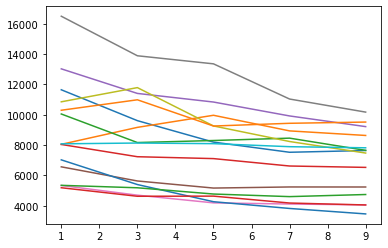

In [49]:
k_df.plot.line(legend=False)

# Multivariate Model

In [74]:
sorted_features=k_df.mean().sort_values()
sorted_features_index=sorted_features.index
print(sorted_features_index)
len(numeric_cars.columns)
len(sorted_features_index)

Index(['engine-size', 'highway-mpg', 'horsepower', 'city-mpg', 'curb-weight',
       'width', 'compression-rate', 'length', 'normalized-losses',
       'wheel-base', 'stroke', 'peak-rpm', 'height', 'bore'],
      dtype='object')


14

In [75]:
def multi_knn_train(train_col,target_col,df):
    np.random.seed(1)
    # randomize the index of rows in dataframe
    shuffle=np.random.permutation(df.index)
    rand_df=df.reindex(shuffle)
    # split the dataframe
    row_index=int(len(rand_df.index)/2)
    train_set=df.iloc[0:row_index]
    test_set=df.iloc[row_index:]
    
    k_value=[5]
    k_rmses={}
    for k in k_value:
        knn=KNeighborsRegressor(n_neighbors=k)
        knn.fit(train_set[train_col],train_set[target_col])
        predictions=knn.predict(test_set[train_col])
        mse=mean_squared_error(test_set[target_col],predictions)
        rmse=np.sqrt(mse)
        k_rmses[k]=rmse
    return k_rmses

In [76]:
k_rmse_results={}
for nr_best_features in range(2,7):
    k_rmse_results['{} best features:'.format(nr_best_features)]=multi_knn_train(sorted_features_index[:nr_best_features],'price',numeric_cars)
k_rmse_results    

{'2 best features:': {5: 4189.331787072757},
 '3 best features:': {5: 3525.1744292774624},
 '4 best features:': {5: 3550.080031840866},
 '5 best features:': {5: 5091.484434283821},
 '6 best features:': {5: 5091.484434283821}}

# Hyperparameter Tuning

In [82]:
def multi_k_knn_train(train_col,target_col,df):
    np.random.seed(1)
    shuffle=np.random.permutation(df.index)
    rand_df=df.reindex(shuffle)
    # split the dataset
    row_index=int(len(rand_df)/2)
    train=df.iloc[0:row_index]
    test=df.iloc[row_index:]
    k_vals=[i for i in range(1,25)]
    k_rmses={}
    for k in k_vals:
        knn=KNeighborsRegressor(n_neighbors=k)
        knn.fit(train[train_col],train[target_col])
        predictions=knn.predict(test[train_col])
        mse=mean_squared_error(test[target_col],predictions)
        rmse=np.sqrt(mse)
        k_rmses[k]=rmse
    return k_rmses

In [91]:
k_rmse_results={}
for x in range(2,6):
    k_rmse_results['{} best features:'.format(x)]=multi_k_knn_train(sorted_features_index[:x],'price',numeric_cars)
k_rmse_results
k_rmse_df=pd.DataFrame(k_rmse_results)
k_rmse_df

,2 best features:,3 best features:,4 best features:,5 best features:
1,4636.183243,3481.992462,3481.216104,5922.135528
2,4542.486243,3431.579896,3453.556365,5333.819210
3,4409.614055,3541.971980,3536.797847,5666.580540
4,4228.206715,3483.244095,3484.449108,5351.617270
5,4189.331787,3525.174429,3550.080032,5091.484434
6,4274.360446,3475.690136,3480.942830,5113.316820
7,4081.509727,3327.705286,3306.132760,5047.518112
8,4031.697934,3237.147598,3180.682309,5018.240822
9,3898.270624,3331.380625,3298.856150,5058.539603
10,3799.118461,3443.310285,3344.830149,5073.618131


Text(0, 0.5, 'RMSE')

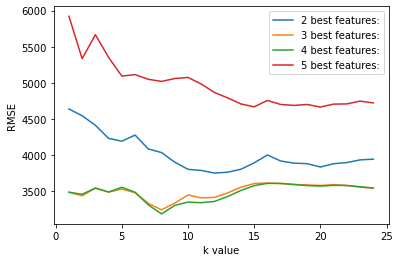

In [96]:
ax=k_rmse_df.plot.line()
ax.set_xlabel('k value')
ax.set_ylabel('RMSE')

In [103]:
numeric_cars.loc[numeric_cars.index[0:40],'fold']=1
numeric_cars.loc[numeric_cars.index[40:80],'fold']=2
numeric_cars.loc[numeric_cars.index[80:120],'fold']=3
numeric_cars.loc[numeric_cars.index[120:160],'fold']=4
numeric_cars.loc[numeric_cars.index[160:],'fold']=5

In [104]:
numeric_cars['fold'].value_counts()

5.0    41
1.0    40
2.0    40
3.0    40
4.0    40
Name: fold, dtype: int64

In [105]:
def k_fold_train(train_col,target_col,df):
    np.random.seed(1)
    shuffle=np.random.permutation(df.index)
    rand_df=df.reindex(shuffle)
    
    knn=KNeighborsRegressor()
    folds=[1,2,3,4,5]
    rmse_set=[]
    for fold in folds:
        train=rand_df[rand_df['fold']!=fold].copy()
        test=rand_df[rand_df['fold']==fold].copy()
        knn.fit(train[[train_col]],train[target_col])
        predictions=knn.predict(test[[train_col]])
        mse=mean_squared_error(test[target_col],predictions)
        rmse=np.sqrt(mse)
        rmse_set.append(rmse)
    return rmse_set

In [106]:
rmses=k_fold_train('length','price',numeric_cars)

In [109]:
avg_rmse=np.mean(rmses)
avg_rmse

7486.968671655579

In [111]:
from sklearn.model_selection import cross_val_score, KFold

In [115]:
kf=KFold(5,shuffle=True,random_state=1)
knn=KNeighborsRegressor()
mses=cross_val_score(knn,numeric_cars[['length']],numeric_cars['price'],scoring='neg_mean_squared_error',cv=kf)
rmses=np.sqrt(np.absolute(mses))
avg_rmse=np.mean(rmses)
avg_rmse

5669.045771715183